## regresion logistica

## Esteban triana aldana

## instalamos librerias

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


## importamos librerias y base de datos

In [4]:
#importamos librerias
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#cargamos la base de datos
ruta_archivo = ('heart_cleveland_upload.csv')
df = pd.read_csv(ruta_archivo)



## Analisis exploratorio 

In [6]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
df.shape

(297, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


## preparacion de datos

In [14]:
#verificamos datos faltantes
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [16]:
# borramos valores faltantes
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [18]:
#verificamos valores duplicados
df.duplicated().sum()

0

<Axes: xlabel='thalach'>

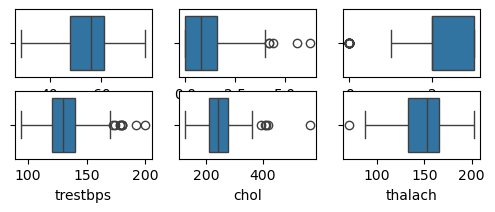

In [22]:
#verificamos valores atipicos
plt.figure(figsize=(6,3))
plt.subplot(3, 3, 1)
snb.boxplot(x=df['age'])
plt.subplot(3, 3, 2)
snb.boxplot(x=df['oldpeak'])
plt.subplot(3, 3, 3)
snb.boxplot(x=df['cp'])
plt.subplot(3, 3, 4)
snb.boxplot(x=df['trestbps'])
plt.subplot(3, 3, 5)
snb.boxplot(x=df['chol'])
plt.subplot(3, 3, 6)
snb.boxplot(x=df['thalach'])




In [28]:
#verificamos valores en 0 
print(df['age'].isin([0]).sum())
print(df['trestbps'].isin([0]).sum())
print(df['chol'].isin([0]).sum())
print(df['thalach'].isin([0]).sum())
print(df['oldpeak'].isin([0]).sum())


0
0
0
0
0


In [26]:
# rellenamos valores basador en la mediana
df['oldpeak']=df['oldpeak'].replace(0,df['oldpeak'].median())

In [30]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


## seleccion de caracteristicas mas relevantes y entreamiento de modelo

In [32]:

# Separar las características (X) de la variable objetivo (y)
X = df.drop('condition', axis=1)  
y = df['condition']               

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los datos
print(X_train.shape, X_test.shape)

(237, 13) (60, 13)


## entrenamos el modelo

In [34]:
model = LogisticRegression(max_iter=1000)
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
#visualizamos el modelo en x
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
273   46    1   3       140   311    0        0      120      1      1.8   
259   51    0   3       130   305    0        0      142      1      1.2   
30    59    1   1       140   221    0        0      164      1      0.8   
22    34    1   0       118   182    0        2      174      0      0.8   
277   45    1   3       142   309    0        2      147      1      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   62    0   3       140   394    0        2      157      0      1.2   
71    29    1   1       130   204    0        2      202      0      0.8   
106   56    1   2       130   256    1        2      142      1      0.6   
270   47    1   3       110   275    0        2      118      1      1.0   
102   58    1   2       140   211    1        2      165      0      0.8   

     slope  ca  thal  
273      1   2     2  
259      1   0     2  
30       0   0    

In [38]:
#visualizamos el modelo en y
print (y_train)

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64


In [40]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred[:10])

[1 1 0 0 1 0 1 1 1 0]


## evaluamos desempeño del modelo

In [42]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy * 100:.2f}%')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(cm)

# Reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión: 73.33%
Matriz de confusión:
[[22 10]
 [ 6 22]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



## Realizamos graficas

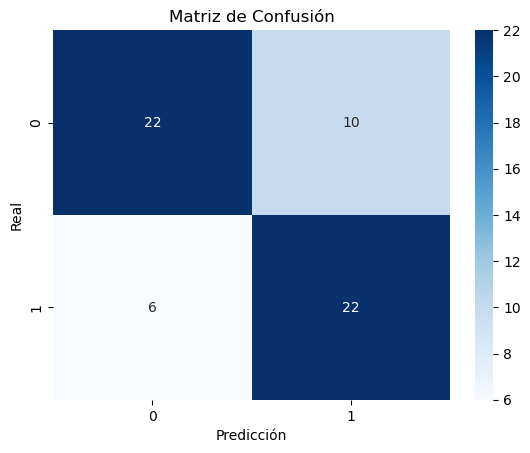

In [44]:
import seaborn as sns
# Visualizar la matriz de confusión usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

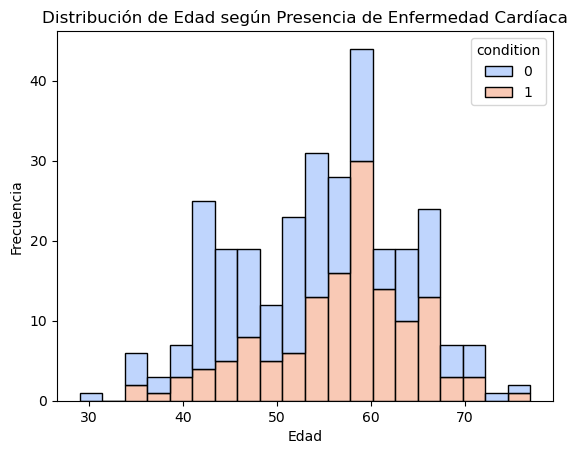

In [46]:
snb.histplot(data=df, x="age", hue="condition", multiple="stack", bins=20, palette="coolwarm")
plt.title("Distribución de Edad según Presencia de Enfermedad Cardíaca")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

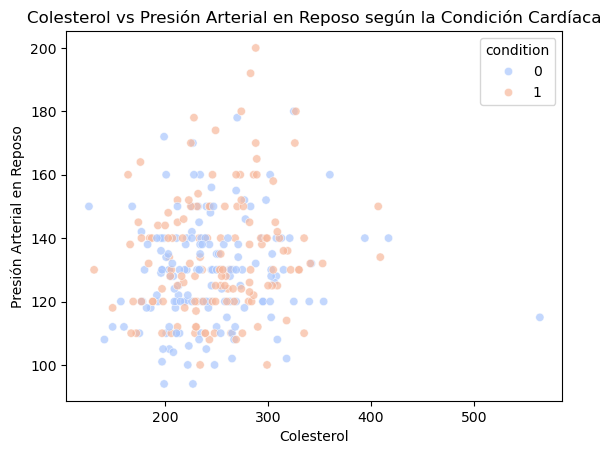

In [48]:
snb.scatterplot(data=df, x="chol", y="trestbps", hue="condition", palette="coolwarm", alpha=0.7)
plt.title("Colesterol vs Presión Arterial en Reposo según la Condición Cardíaca")
plt.xlabel("Colesterol")
plt.ylabel("Presión Arterial en Reposo")
plt.show()

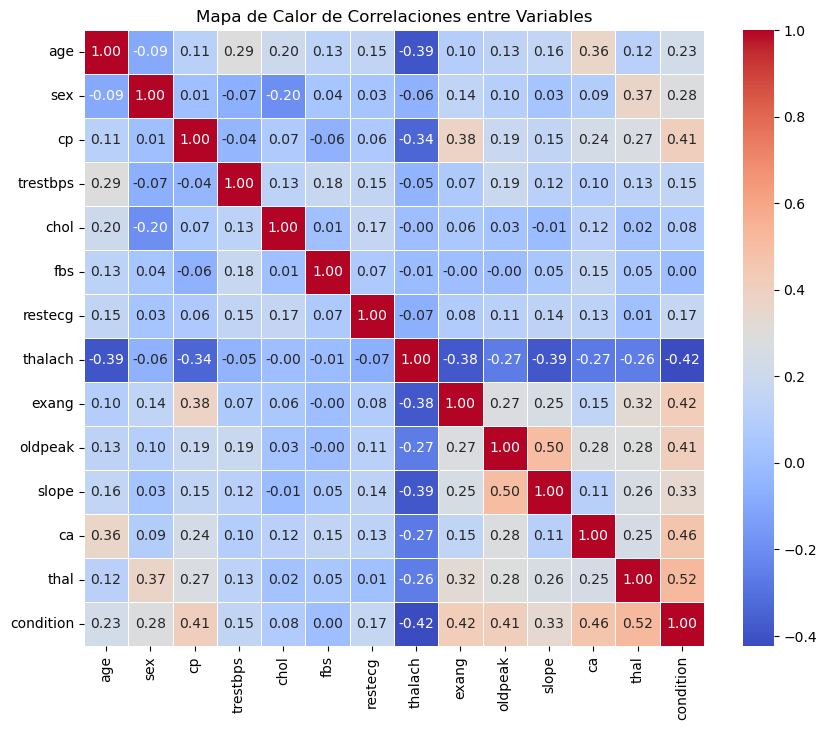

In [50]:
plt.figure(figsize=(10,8))
snb.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()

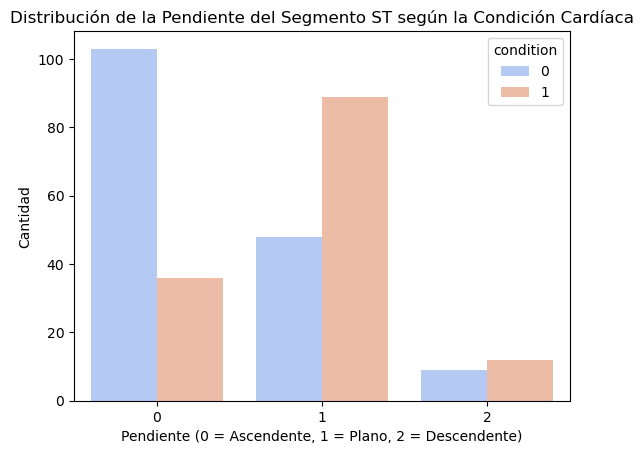

In [52]:
snb.countplot(data=df, x="slope", hue="condition", palette="coolwarm")
plt.title("Distribución de la Pendiente del Segmento ST según la Condición Cardíaca")
plt.xlabel("Pendiente (0 = Ascendente, 1 = Plano, 2 = Descendente)")
plt.ylabel("Cantidad")
plt.show()

## Interpretacion de resultados

El histograma muestra cómo se distribuyen las edades de los pacientes con respecto a la presencia de enfermedad cardíaca. Si observamos que hay más personas con enfermedad cardíaca en edades avanzadas 60 años, 

El gráfico de dispersión permite observar si existe alguna relación entre el nivel de colesterol y la presión arterial en reposo. Si las personas con enfermedad cardíaca propensa a agruparse en valores altos de colesterol y presión arterial, esto indicaría una posible asociación entre estas dos variables y la presencia de enfermedad cardíaca. 

El mapa de calor muestra la fuerza de las correlaciones entre las diferentes variables. Las correlaciones cercanas a 1 (positivas) oa -1 (negativas) indican una relación fuerte. Si observamos que variables como el colesterol, la edad o la presión arterial tienen una variación significativa con la enfermedad cardíaca, podríamos considerarlas como predictores importantes en el modelo.

se analiza que una mayor proporción de personas con enfermedad cardíaca tiene una pendiente ascendente, mientras que las personas sin enfermedad presentan más frecuentemente una pendiente plana

en la matriz de confuncion:
Verdaderos Positivos (TP) : Pacientes que realmente tienen enfermedad cardíaca y fueron correctamente predichos como enfermos por el modelo : 22
Verdaderos Negativos (TN) : Pacientes que no tienen enfermedad cardíaca y fueron correctamente predichos como no enfermos: 10
Falsos Positivos (FP) : Pacientes que fueron predichos como enfermos pero no tienen la enfermedad. Estos son "falsas alarmas" : 6
Falsos Negativos (FN) : Pacientes que realmente tienen enfermedad cardíaca, pero el modelo predijo incorrectamente que no la tienen: 22